(0.0, 2.0)

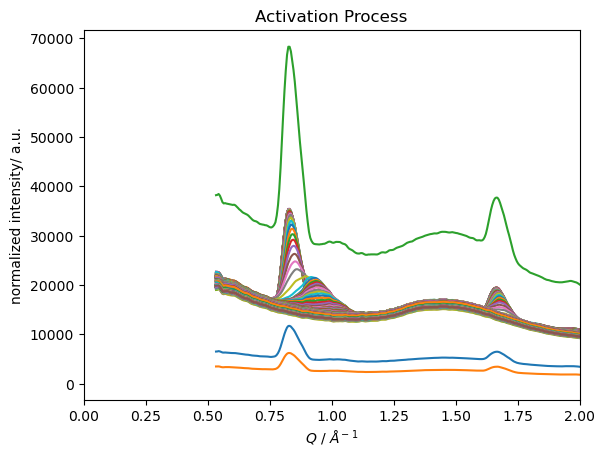

In [51]:
from cProfile import label
from stringprep import in_table_b1
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import glob
import os

path = 'C:/Users/Fabio/Desktop/Felix_desy2023/FMue_1/*.dat'

file_list = glob.glob(path)

data_dict = {}
count = 0  # Counter for number of files processed
for file_name in file_list:
    #if count >= 10000:  # Stop processing files after 100 have been processed
       # break
    #if count > 1:  # Only include the first 25 files
    name = file_name.split('/')[-1]
    name = name[3:-3]
    data = np.loadtxt(file_name, skiprows=23)
    max_y = np.max(data[:, 1])  # Find the maximum y value
    norm_y = data[:, 1] / max_y  # Normalize the y data
    data_dict[name] = (data[:, 0], data[:, 1])  # Store the normalized data
        
        
    #count += 1

# Plot the data
fig, ax = plt.subplots()
for name, data in data_dict.items():
    ax.plot(data[0], data[1], label=name)
#ax.legend(loc = 'center left') #bbox_to_anchor=(1.05,0.5), ncol=2
plt.xlabel('$Q$ / $\AA$$^-$$^1$')
plt.ylabel('normalized intensity/ a.u.')
plt.title('Activation Process')
#print(name)
plt.xlim(0,2)
#plt.ylim(8000,25000)

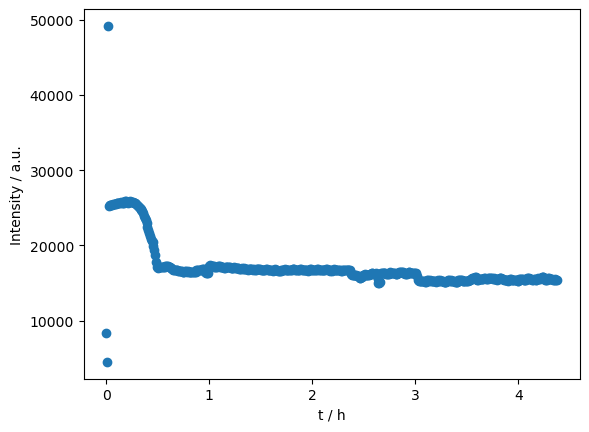

In [53]:

from cProfile import label
from stringprep import in_table_b1
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import glob
import os


fig, ax = plt.subplots()
path = 'C:/Users/Fabio/Desktop/Felix_desy2023/FMue_1/*.dat'
base_path = 'C:/Users/manzoni/Desktop/NiFe_dyn_Kat/'
file_list = glob.glob(path)

peak_values = []

for i, file_name in enumerate(file_list):
    # if i < 4:
    #     continue
    name = file_name.split('/')[-1]
    name = name[3:-3]
    data = np.loadtxt(file_name, skiprows=26)
    max_y = np.max(data[:, 1])
    norm_y = data[:, 1] / max_y

    # Find peak value between 2.4 and 2.55
    x_vals = data[:, 0]
    y_vals = data[:, 1]
    peak_mask = np.logical_and(x_vals >= 0.75, x_vals <= 0.8)
    peak_value = np.max(y_vals[peak_mask])

    peak_values.append([i, peak_value])

      # Print the file name and peak value
    #print(f"File: {i}  Peak Value: {peak_value}")



#Save peak values to a txt file
# with open('peak_values.txt', 'w') as f:
#     for entry in peak_values:
#         f.write(f'{entry[0]}\t{entry[1]}\n')


# Convert peak_values to NumPy array for plotting
peak_values = np.array(peak_values)

# Scatter plot of peak values
ax.scatter(peak_values[:, 0] / 120, peak_values[:, 1])
ax.set_xlabel('t / h')
ax.set_ylabel('Intensity / a.u.')
#plt.title('Fe$_2$NiO$_4$ (311) peak intensity')

# for i in range(7):
#     start = 114 * i / 120
#     end = start + 57 / 120
#     ax.axvspan(start, end, facecolor='green', alpha=0.2)
# # for i in range(4):
# #     start = 114 * i + 57
# #     end = start + 57
# #     plt.axvspan(start, end, facecolor='green', alpha=0.2)
# for i in range(1):
#     start = i + 809 / 120
#     end = start + 200 / 120
#     ax.axvspan(start, end, facecolor='red', alpha=0.2)
# ax.set_xticks(np.arange(0, 10, 2))
# ax.set_xlim(0, peak_values[:, 0].max()/120)

# plt.savefig(f'{base_path}spinel_peak.png', bbox_inches='tight', dpi=600)
# plt.savefig(f'{base_path}spinel_peak.pdf', bbox_inches='tight', dpi=600)
#plt.ylim(8000,20000)
plt.show()